<a href="https://colab.research.google.com/github/sophtsai/Heart-Disease-ML/blob/main/Predicting_Heart_Disease_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
!pip install matplotlib --upgrade
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from collections import Counter
import plotly.express as px
from plotly.subplots import make_subplots

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
df = pd.read_csv('/content/drive/MyDrive/BTT Personal Project (Group 14)/heart_2020_cleaned.csv')
df   

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [3]:
# Check for nulls
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

# **Visualizations & EDA**

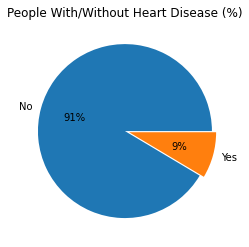

In [5]:
# Percentage of People with/without Heart Disease
fig, ax = plt.subplots(1, 1,figsize =(8, 4))
ax.pie(df['HeartDisease'].value_counts(),autopct='%1.0f%%',labels=['No',"Yes"],explode=(0,0.05))
ax.set_title('People With/Without Heart Disease (%)')
fig.show()

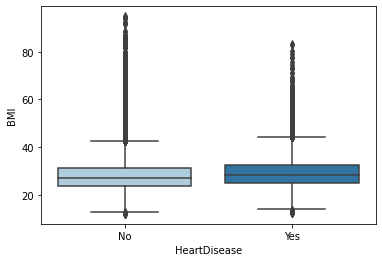

In [6]:
sns.set_palette("Paired")
ax = sns.boxplot(x="HeartDisease", y = "BMI", data=df) #from the original dataset 
plt.show()

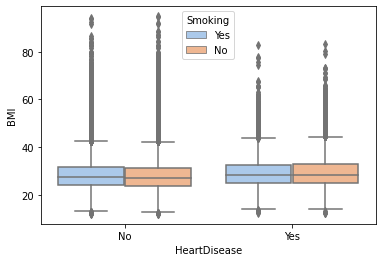

In [7]:
sns.set_palette("pastel")
ax = sns.boxplot(x="HeartDisease", y = "BMI", hue = "Smoking", data=df)
plt.show()

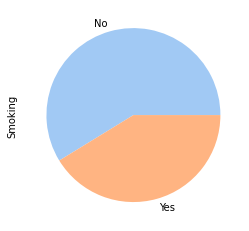

In [8]:
df.Smoking.value_counts().plot(kind='pie');

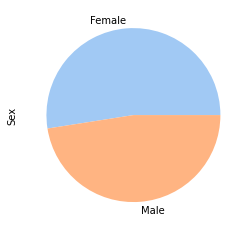

In [9]:
df.Sex.value_counts().plot(kind='pie');

In [10]:
df1 = df.groupby(["AgeCategory"]).count().reset_index()

fig1 = px.bar(df1,
             y=df.groupby(["AgeCategory"]).size(),
             x="AgeCategory",
             color='AgeCategory')
fig1.show()

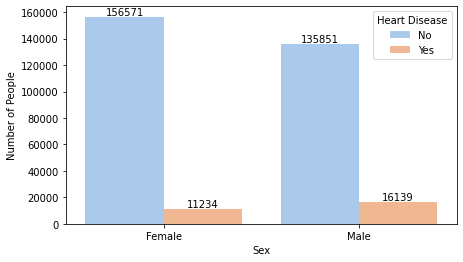

In [11]:
# Sex: People with Heart Disease
plt.figure(figsize=(7, 4))
ax = sns.countplot(data=df, x='Sex', hue='HeartDisease')
ax.set(xlabel='Sex', ylabel='Number of People')
ax.legend(title='Heart Disease')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

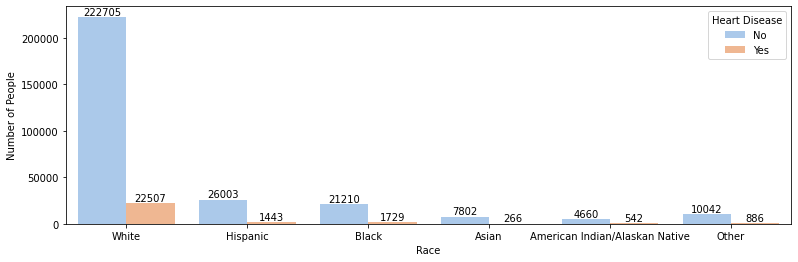

In [12]:
# Race: People with Heart Disease
plt.figure(figsize=(13, 4))
ax = sns.countplot(data=df, x='Race', hue='HeartDisease', order=['White', 'Hispanic', 'Black', 'Asian', 'American Indian/Alaskan Native', 'Other'])
ax.set(xlabel='Race', ylabel='Number of People')
ax.legend(title='Heart Disease')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

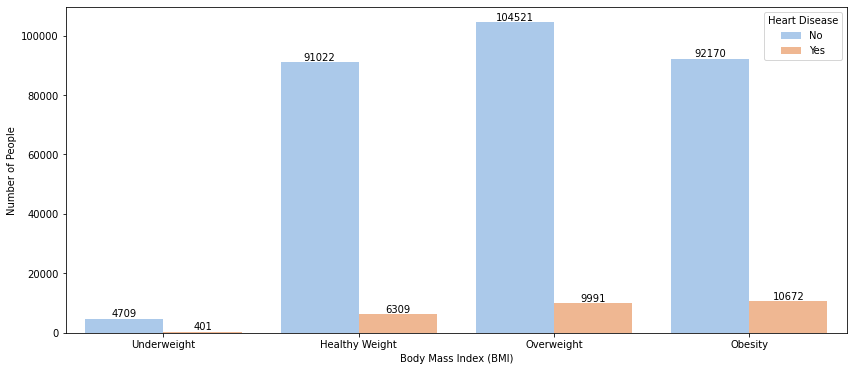

In [13]:
# BMI (Categorized Barplot): People with Heart Disease
df.loc[df['BMI']<18.5, 'BMIGroup'] = 'Underweight'
df.loc[df['BMI'].between(18.5,25,inclusive='left'), 'BMIGroup'] = 'Healthy Weight'
df.loc[df['BMI'].between(25,30,inclusive='left'), 'BMIGroup'] = 'Overweight'
df.loc[df['BMI']>=30, 'BMIGroup'] = 'Obesity'

plt.figure(figsize=(14, 6))
ax = sns.countplot(data=df, x='BMIGroup', hue='HeartDisease')
ax.set(xlabel='Body Mass Index (BMI)', ylabel='Number of People')
ax.legend(title='Heart Disease')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

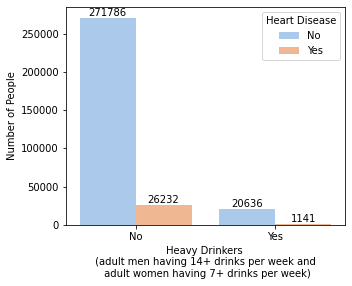

In [14]:
# Heavy vs Nonheavy drinkers: People with Heart Disease
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=df, x='AlcoholDrinking', hue='HeartDisease')
ax.set(xlabel='Heavy Drinkers \n (adult men having 14+ drinks per week and \n adult women having 7+ drinks per week)', ylabel='Number of People')
ax.legend(title='Heart Disease')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

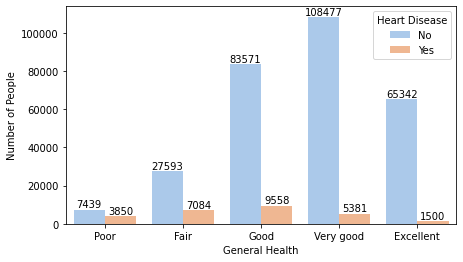

In [15]:
# General Health: People with Heart Disease
plt.figure(figsize=(7, 4))
ax = sns.countplot(data=df, x='GenHealth', hue='HeartDisease', order=['Poor', 'Fair', 'Good', 'Very good', 'Excellent'])
ax.set(xlabel='General Health', ylabel='Number of People')
ax.legend(title='Heart Disease')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

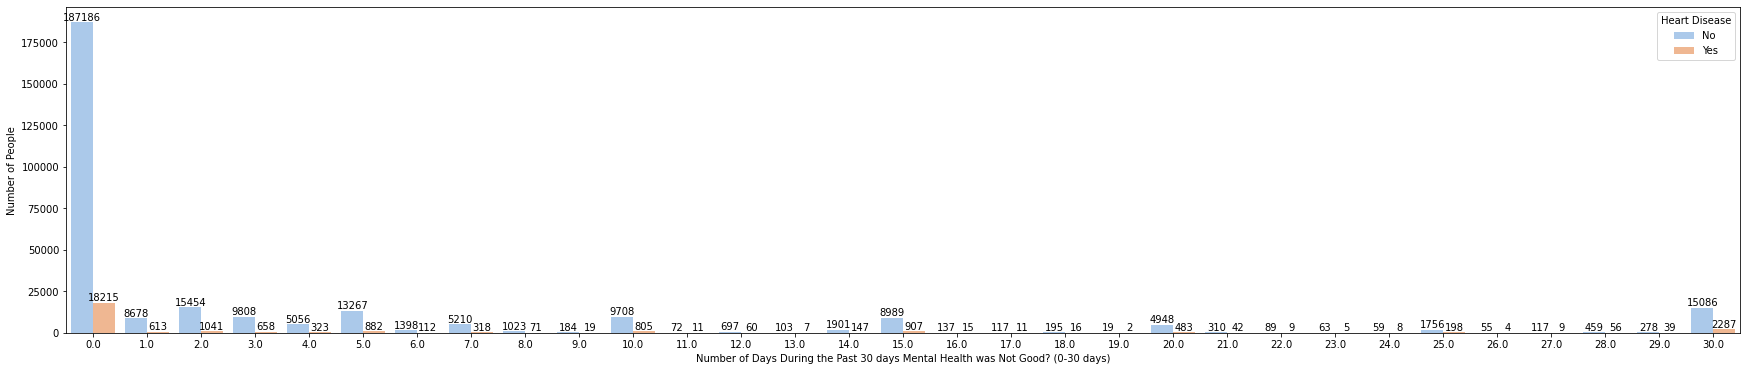

In [16]:
# Mental Health: People with Heart Disease
plt.figure(figsize=(30, 6))
ax = sns.countplot(data=df, x='MentalHealth', hue='HeartDisease')
ax.set(xlabel='Number of Days During the Past 30 days Mental Health was Not Good? (0-30 days)', ylabel='Number of People')
ax.legend(title='Heart Disease')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

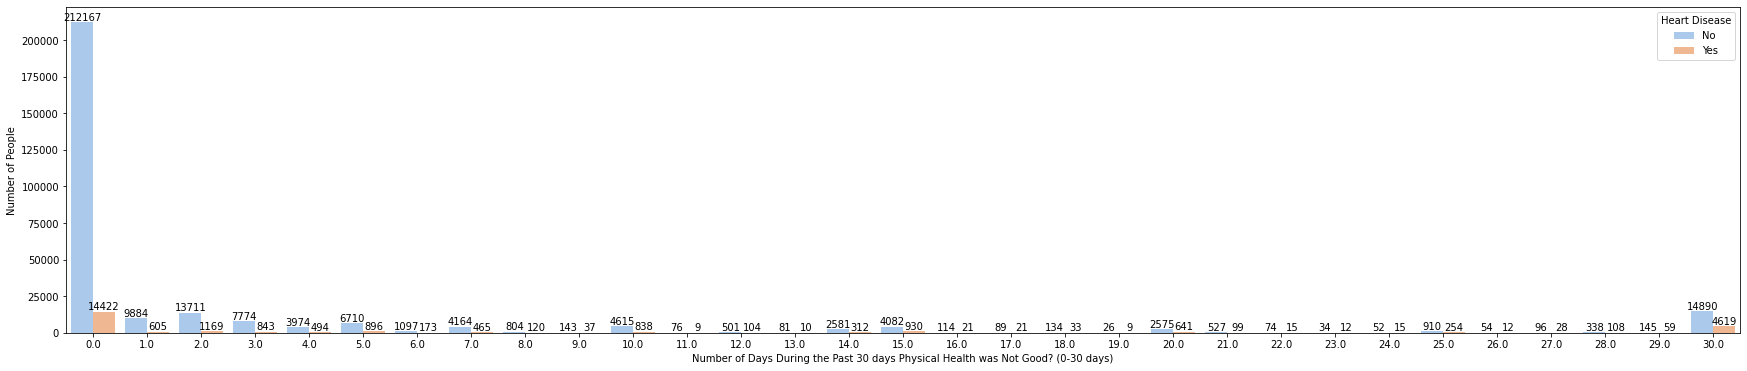

In [17]:
# Physical Health: People with Heart Disease
plt.figure(figsize=(30, 6))
ax = sns.countplot(data=df, x='PhysicalHealth', hue='HeartDisease')
ax.set(xlabel='Number of Days During the Past 30 days Physical Health was Not Good? (0-30 days)', ylabel='Number of People')
ax.legend(title='Heart Disease')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

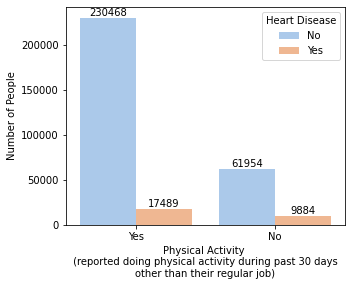

In [18]:
# Physical Activity: People with Heart Disease
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=df, x='PhysicalActivity', hue='HeartDisease')
ax.set(xlabel='Physical Activity \n (reported doing physical activity during past 30 days \nother than their regular job)', ylabel='Number of People')
ax.legend(title='Heart Disease')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

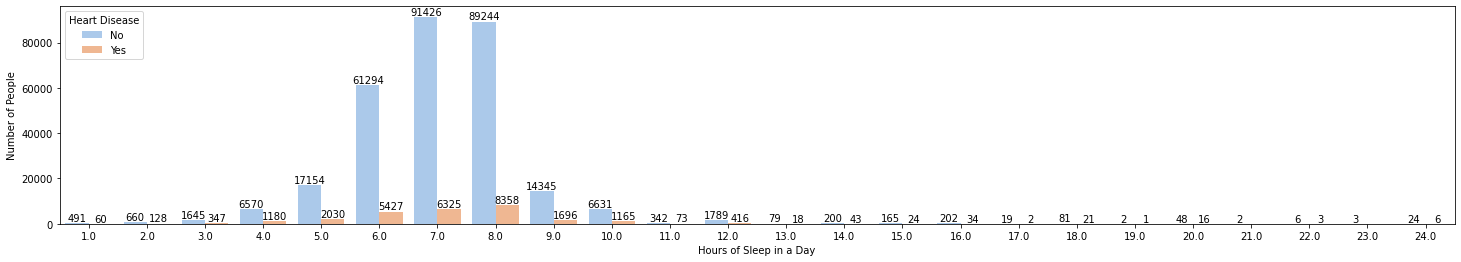

In [19]:
# Sleep Time: People with Heart Disease
plt.figure(figsize=(25, 4))
ax = sns.countplot(data=df, x='SleepTime', hue='HeartDisease')
ax.set(xlabel='Hours of Sleep in a Day', ylabel='Number of People')
ax.legend(title='Heart Disease')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

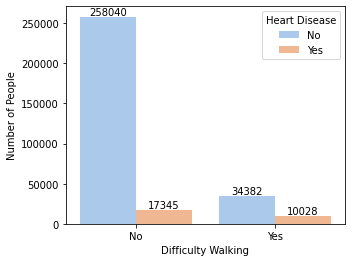

In [20]:
# Difficulty Walking: People with Heart Disease
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=df, x='DiffWalking', hue='HeartDisease')
ax.set(xlabel='Difficulty Walking', ylabel='Number of People')
ax.legend(title='Heart Disease')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

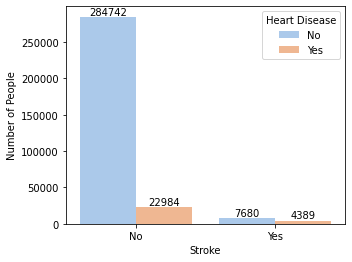

In [21]:
# Stroke: People with Heart Disease
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=df, x='Stroke', hue='HeartDisease')
ax.set(xlabel='Stroke', ylabel='Number of People')
ax.legend(title='Heart Disease')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

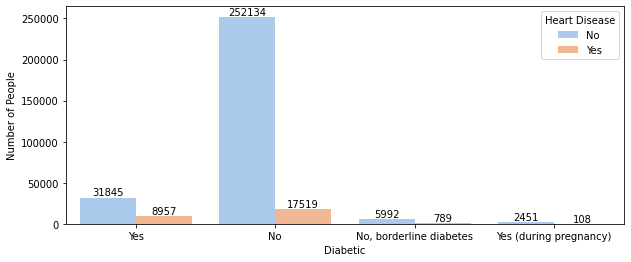

In [22]:
# Diabetic: People with Heart Disease
plt.figure(figsize=(10, 4))
ax = sns.countplot(data=df, x='Diabetic', hue='HeartDisease')
ax.set(xlabel='Diabetic', ylabel='Number of People')
ax.legend(title='Heart Disease')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

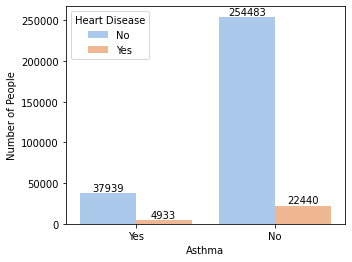

In [23]:
# Asthma: People with Heart Disease
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=df, x='Asthma', hue='HeartDisease')
ax.set(xlabel='Asthma', ylabel='Number of People')
ax.legend(title='Heart Disease')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

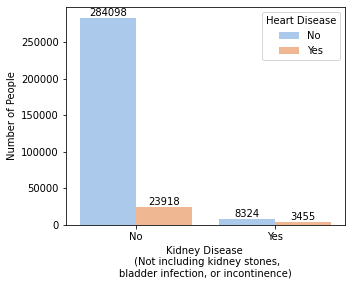

In [24]:
# Kidney Disease: People with Heart Disease
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=df, x='KidneyDisease', hue='HeartDisease')
ax.set(xlabel='Kidney Disease \n (Not including kidney stones,\nbladder infection, or incontinence)', ylabel='Number of People')
ax.legend(title='Heart Disease')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

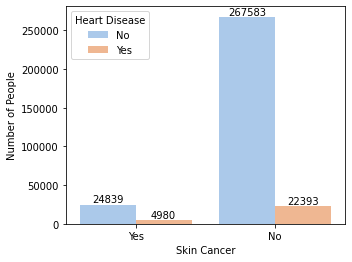

In [25]:
# Skin Cancer: People with Heart Disease
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=df, x='SkinCancer', hue='HeartDisease')
#ax = sns.displot(data=df, x='SkinCancer', hue='HeartDisease', multiple='stack')
ax.set(xlabel='Skin Cancer', ylabel='Number of People')
ax.legend(title='Heart Disease')
for container in ax.containers:
    ax.bar_label(container)
plt.show()